In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# 1. Data Processing

In [67]:
# load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

data_size = 28 # 28 x 28

# normalize datasets
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshape the data size
x_train = x_train.reshape(-1, data_size, data_size, 1)
x_test = x_test.reshape(-1, data_size, data_size, 1)

# set validation data
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

# 2. Building the CNN Model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [69]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_size, data_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [70]:
model.compile(
    optimizer='adam', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Training & Evaluation

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay

In [113]:
histories =[]
history = model.fit(x_val_train, y_val_train, epochs=30, validation_data=(x_val_test, y_val_test))
histories.append(history)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8880 - loss: 0.3071 - val_accuracy: 0.8804 - val_loss: 0.3141
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8896 - loss: 0.2968 - val_accuracy: 0.8953 - val_loss: 0.2872
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8913 - loss: 0.2934 - val_accuracy: 0.8974 - val_loss: 0.2839
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8945 - loss: 0.2911 - val_accuracy: 0.8977 - val_loss: 0.2850
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8954 - loss: 0.2847 - val_accuracy: 0.8991 - val_loss: 0.2780
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8939 - loss: 0.2896 - val_accuracy: 0.8848 - val_loss: 0.3083
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8984 - loss: 0.2821 - val_accuracy: 0.8985 - val_loss: 0.2781
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8988 - loss: 0.2789 

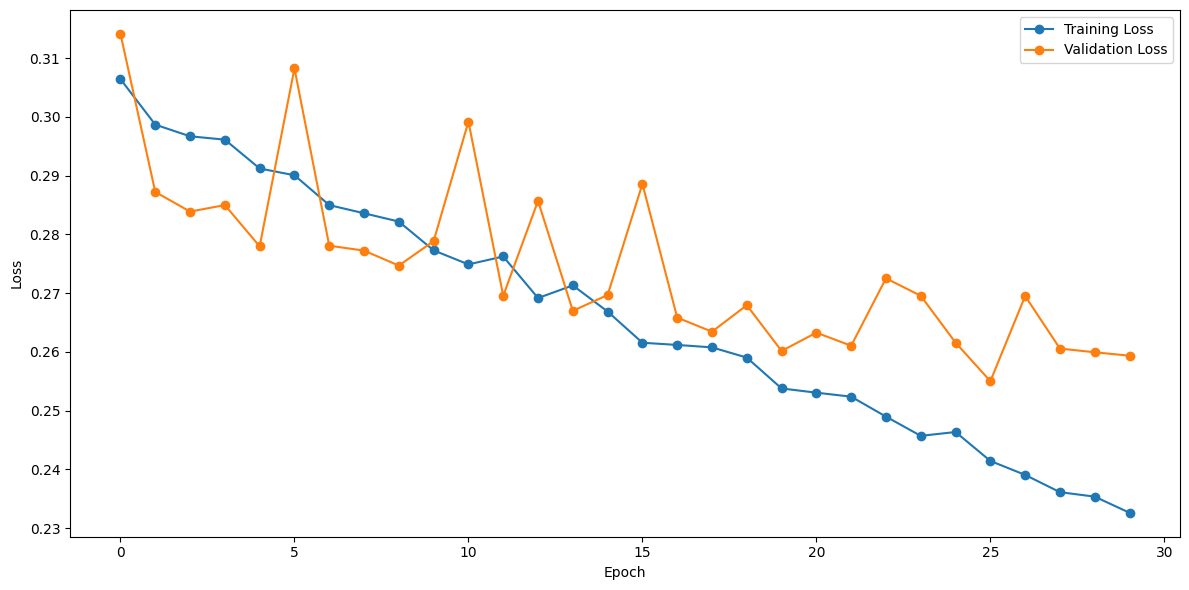

In [114]:
# plot loss curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [121]:
test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy[1] * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9000 - loss: 0.2735
Test Accuracy: 89.96%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


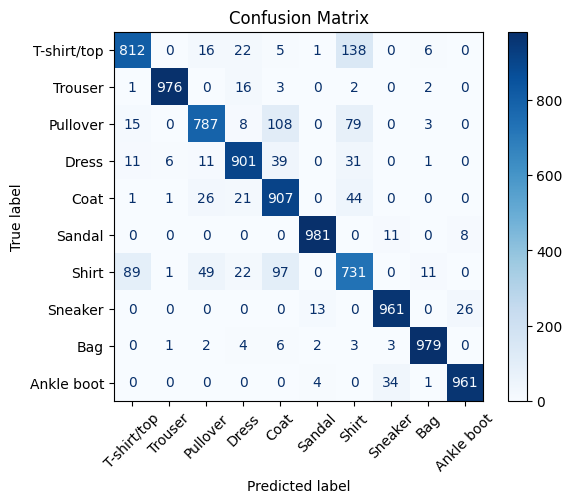

In [122]:
pred = model.predict(x_test)
pred_labels = np.argmax(pred, axis=1)  # Convert probabilities to class labels
# Use confusion_matrix instead of multilabel_confusion_matrix
cm = confusion_matrix(y_test, pred_labels)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 4.  Experimentation & Improvements

In [124]:
# define a function that executes: training, evaluation, plotting/drawing loss function and confusion matrix

def execute_model(model):
    # history
    history = model.fit(x_val_train, y_val_train, epochs=30, validation_data=(x_val_test, y_val_test))
    histories.append(history)

    # plot loss curve
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], marker='o', label='Training Loss')
    plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Prediction
    pred = model.predict(x_test)

    # Convert probabilities to class labels
    pred_labels = np.argmax(pred, axis=1)

    # Use confusion_matrix instead of multilabel_confusion_matrix
    cm = confusion_matrix(y_test, pred_labels)

    # Show confusion matrix
    ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model.name}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # Show the test accuracy as the final model's score
    test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_accuracy[1] * 100:.2f}%")

In [125]:
# Modification#1: increase the number of layers
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_size, data_size, 1)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Dropout(0.3))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
model2.compile(
    optimizer='adam', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7274 - loss: 0.7478 - val_accuracy: 0.8664 - val_loss: 0.3632
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8690 - loss: 0.3579 - val_accuracy: 0.8937 - val_loss: 0.2821
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8947 - loss: 0.2919 - val_accuracy: 0.9012 - val_loss: 0.2599
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9057 - loss: 0.2541 - val_accuracy: 0.9054 - val_loss: 0.2537
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9178 - loss: 0.2231 - val_accuracy: 0.9120 - val_loss: 0.2349
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9254 - loss: 0.1985 - val_accuracy: 0.9123 - val_loss: 0.2425
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9273 - loss: 0.1893 - val_accuracy: 0.9179 - val_loss: 0.2292
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9373 - loss: 0.164

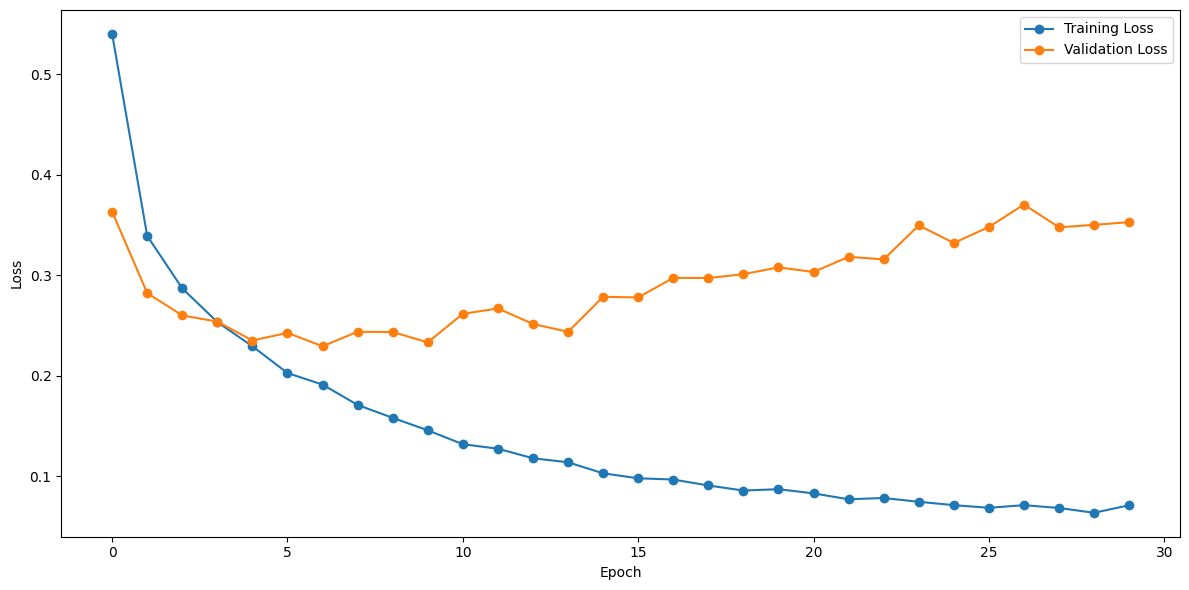

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


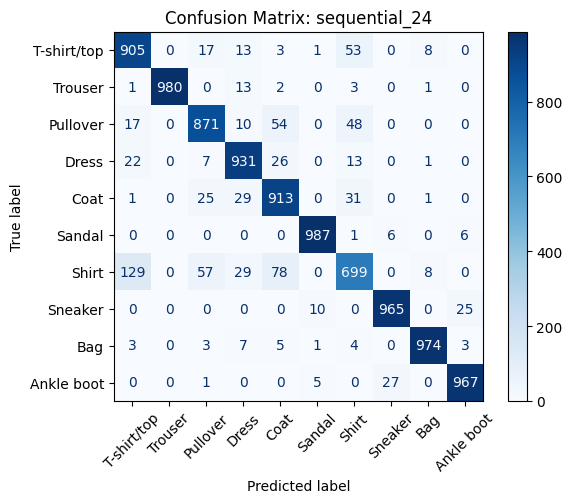

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9217 - loss: 0.3795
Test Accuracy: 91.92%


In [127]:
execute_model(model2)

In [128]:
# Modification#2: change filter size 3x3 -> 5x5
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation='relu', input_shape=(data_size, data_size, 1)))
model3.add(MaxPooling2D((3, 3)))
model3.add(Conv2D(64, (5, 5), activation='relu'))
model3.add(MaxPooling2D((3, 3)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(
    optimizer='adam', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6433 - loss: 0.9774 - val_accuracy: 0.8393 - val_loss: 0.4409
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8338 - loss: 0.4640 - val_accuracy: 0.8601 - val_loss: 0.3783
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8612 - loss: 0.3920 - val_accuracy: 0.8726 - val_loss: 0.3486
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8765 - loss: 0.3476 - val_accuracy: 0.8824 - val_loss: 0.3208
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8805 - loss: 0.3251 - val_accuracy: 0.8737 - val_loss: 0.3379
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8925 - loss: 0.2959 - val_accuracy: 0.8933 - val_loss: 0.2959
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8939 - loss: 0.2873 - val_accuracy: 0.8878 - val_loss: 0.3058
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8978 - loss: 0.2794 -

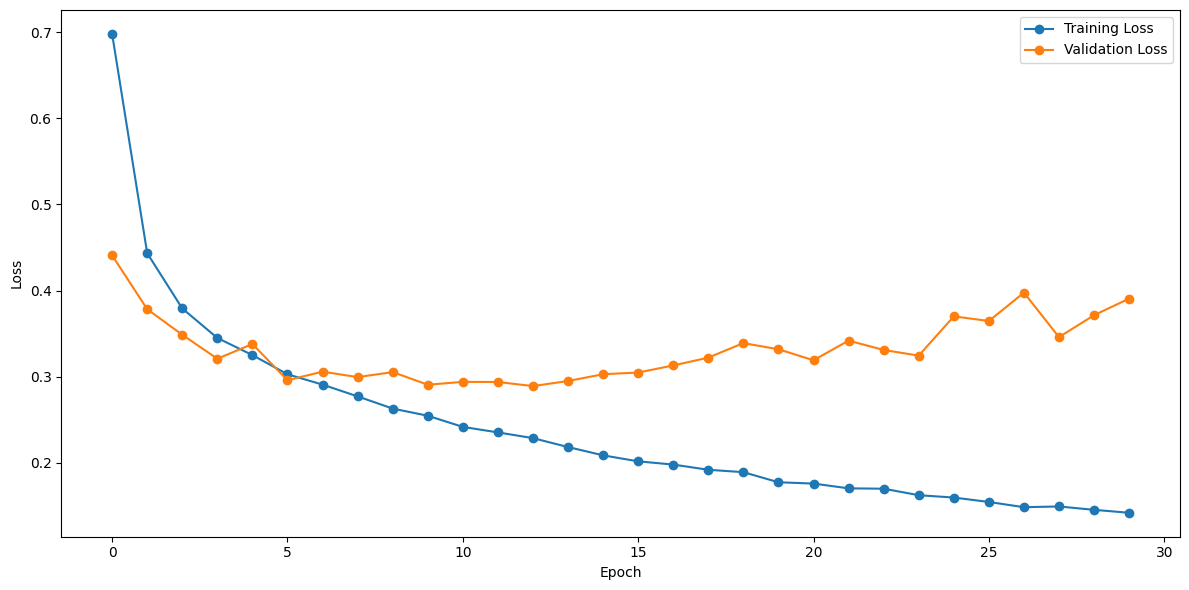

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


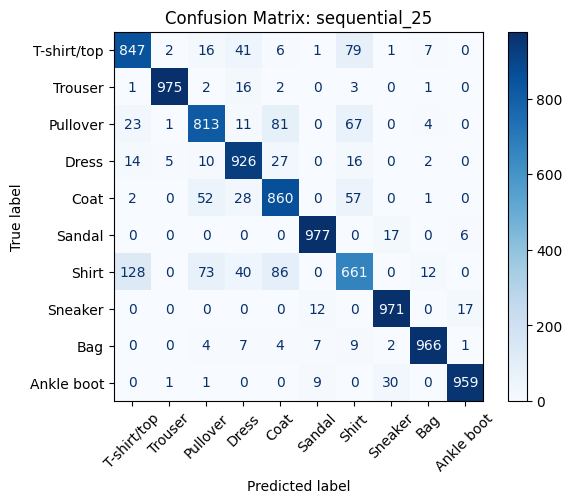

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8941 - loss: 0.4656
Test Accuracy: 89.55%


In [129]:
execute_model(model3)

In [130]:
# Modification#3: change optimizer
model4 = model
model4.compile(
    optimizer='sgd', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9162 - loss: 0.2311 - val_accuracy: 0.9077 - val_loss: 0.2555
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9147 - loss: 0.2304 - val_accuracy: 0.9085 - val_loss: 0.2564
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9169 - loss: 0.2260 - val_accuracy: 0.9075 - val_loss: 0.2637
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9149 - loss: 0.2305 - val_accuracy: 0.9100 - val_loss: 0.2576
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9159 - loss: 0.2247 - val_accuracy: 0.8991 - val_loss: 0.2807
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9187 - loss: 0.2168 - val_accuracy: 0.9102 - val_loss: 0.2532
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9197 - loss: 0.2191 - val_accuracy: 0.9083 - val_loss: 0.2588
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9203 - loss: 0.2148 

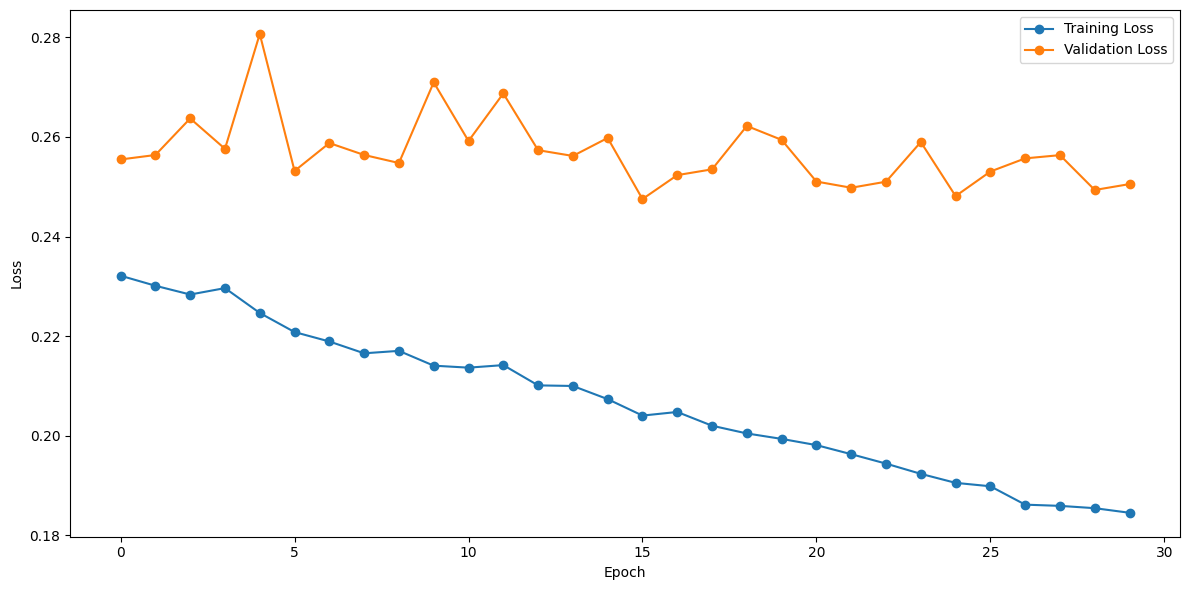

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


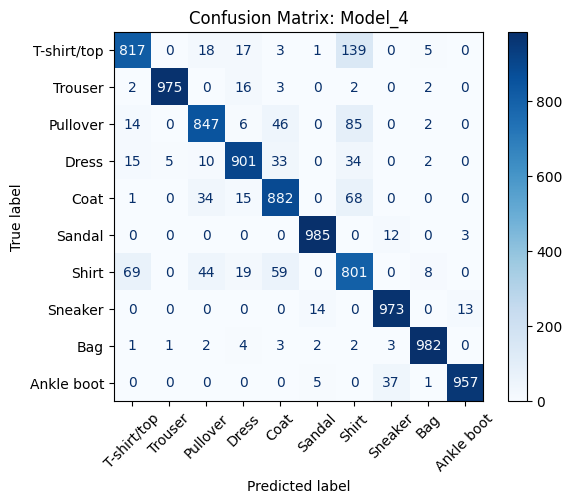

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9137 - loss: 0.2654
Test Accuracy: 91.20%


In [131]:
execute_model(model4)

In [135]:
# Comparison of models
model.name = 'Model_1'
model2.name = 'Model_2'
model3.name = 'Model_3'
model4.name = 'Model_4'

models = [model, model2, model3, model4]

for model in models:
    model.summary()
    score = model.predict(x_test)
    # Calculate accuracy by comparing predicted labels to true labels
    pred_labels = np.argmax(score, axis=1)  # Convert probabilities to class labels
    accuracy = np.mean(pred_labels == y_test)  # Calculate accuracy
    print(f"Test Accuracy for {model.name}: {accuracy * 100:.2f}%")
    print('\n')

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy for Model_4: 91.20%




Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,538,784 (13.50 MB)

 Trainable params: 1,179,594 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,359,190 (9.00 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy for Model_2: 91.92%




Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 4, 4, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy for Model_3: 89.55%




Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy for Model_4: 91.20%


